# Importing / Installing libraries

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.axes import Subplot as splt
from sklearn import preprocessing
import seaborn as sns

In [3]:
# from sklearn import datasets, linear_model
# from sklearn.model_selection import train_test_split
# from sklearn import metrics
# from sklearn import preprocessing # puts the features in standard format
# from sklearn import pipeline 

In [4]:
# !pip3 install seaborn==0.9.0

# import matplotlib.pyplot as plt
# sns.set(style="ticks", color_codes=True)


## FINAL DATAFRAME

In [5]:
df = pd.read_csv('csv_files/12_11_DF_FINAL.csv')

In [6]:
df.head()

,Total SNAP,Life Expectancy,County,Percent Smokers,State,Percent Obese,Unemployment_rate_2010,min_wage
0,14105,75.74,Autauga County,25.8,Alabama,30.5,8.9,7.25
1,37409,77.80,Baldwin County,23.0,Alabama,26.6,10.0,7.25
2,11984,75.34,Barbour County,26.8,Alabama,37.3,12.3,7.25
3,7648,74.13,Bibb County,30.1,Alabama,34.3,11.4,7.25
4,16461,76.41,Blount County,27.9,Alabama,30.4,9.8,7.25


# INITIAL EXPLORATORY DATA ANALYSIS (EDA)

## EVALUATING FEATURES FOR REGRESSION ANALYSIS

In order to run a linear regression analysis, our data need to meet three criteria: 
- they need to be normally distributed
- they need to be linear 
- they need homoskedastic

### STEP 1: CHECKING FOR NORMALITY

Let's view some histograms of our data to evaluate whether they're normally distributed or not

In [7]:
# First, we assign all of our features to variables so that we can plot them more easily

unemploy_rate = df['Unemployment_rate_2010']
percent_obese = df['Percent Obese']
num_foodstamps = df['Total SNAP']
life_expect = df['Life Expectancy']
percent_smoke = df['Percent Smokers']
min_wage = df['min_wage']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a126ef9b0>,
      dtype=object)

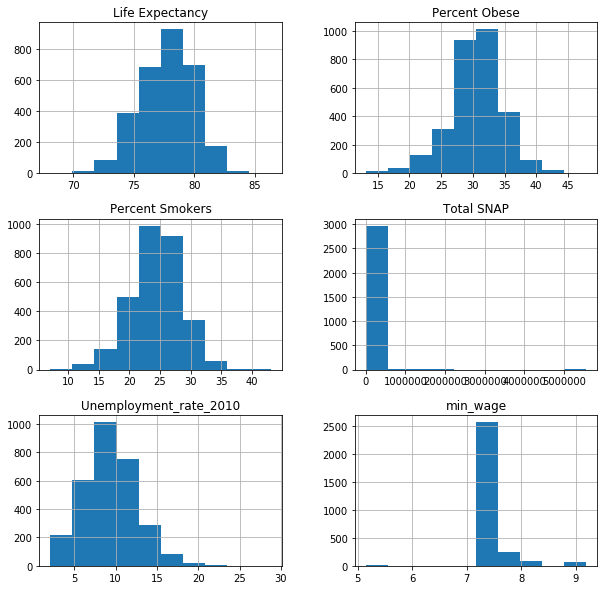

In [8]:
# Now we plot them to see what their distributions look like before we do anything to them

df.hist(column=['Unemployment_rate_2010', 'Percent Obese', 'Total SNAP', 'Life Expectancy','Percent Smokers', 'min_wage'], figsize=(10,10))
# df.hist(unemploy_rate, percent_obese)

Above, we can see that that majority of our data is normally distributed, which is great! 

We can also see, however, that some strange things are going on with our food stamps (SNAP) data and our minimum wage data.

 - Our minimum-wage data's weirdness is due to the fact that it is on the state-level, while the rest of our data is on the county-level. So, we'll leave that one alone for now.

- However, we can see that the scale of our SNAP data is all wacky. In order to bring its distribution into a better perspective, let's "log-transform" it. (When we log-transform a dataset, we are doing _, thereby helping it become less skewed and lowering its variability.)

/Users/flatironschool/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a12bb3940>]],
      dtype=object)

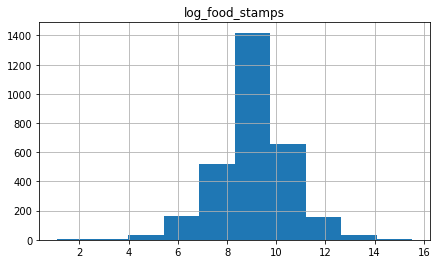

In [9]:
# Log-transforming our food stamps data:

# 1) Create new dataframe to pass in log values of Food Stamps var
data_log = pd.DataFrame([])

# 2) Create columns to hold log values
data_log['log_food_stamps'] = np.log(df['Total SNAP'])

# 3) If value is zero, it will be negative inf when taking the log
data_log = data_log.replace([np.inf, -np.inf], np.nan).dropna(subset=['log_food_stamps'], how="all")

# 4) Graph the normalized histogram
data_log.hist(figsize=[7,4])


Now that looks **much better**!

### STEPS 2 & 3: CHECKING FOR LINEARITY AND HOMOSKEDASTICITY


Our features have to have a linear relationship with our dependent variable (Life Expectancy) for our analysis to be valid. 

Additionally, our features have to be *homoskedastic*, essentially meaning that all of the datapoints within our features have the relatively the same variance. If you accidentally think your data is heteroskedastic when it's homoskedastic, you'll run the risk of overfitting your model. So, it's important to have a handle on this!

Luckily, we can use the same plots to gauge linearity and homoskedasticity: scatter plots! If our features have linear relationships with our dependent variable (Life Expectancy), our scatters will form a line cluster going either in the positive or negative direction. If our features are homoskedastic, they will be scattered across our graph in a consistently-dense way (i.e. the dots do not form a horizontal cone shape in either direction).



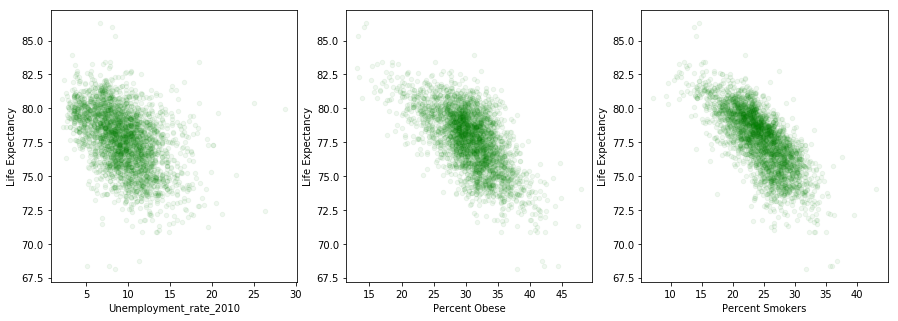

In [10]:
# setting up our scatters to have 2x3
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

# Loop through continuous variables to create scatter plots
for xcol, ax in zip(['Unemployment_rate_2010','Percent Obese','Percent Smokers'], axes):
    df.plot(kind='scatter', x=xcol, y='Life Expectancy', ax=ax, alpha=0.06, color='g')


Above, we can clearly see that Unemployment Rate, Obesity, and Smoking have a negative linear relationship with Life Expectancy, which makes sense.

We can also see that our points do not seem to be more dense at either end of our plot (excluding outliers, which are normal). Therefore, our data seems to be homoskedastic.

In [11]:
# ^ don't know if "dense" is the right adjective to describe homoeskedasticity here

Let's checkout whether or not our log-transformed Food Stamps data has a linear relationship with Life Expectancy: 


In [12]:
# We replace the total Food Stamps column in our original dataframe with our log-transformed values
# To do this, we combine our two tables (our original w/our one that holds the log-ed values for food stamps) and then drop the columns we don't need anymore from that new dataframe

df = pd.concat([df,data_log],axis=1)
df

,Total SNAP,Life Expectancy,County,Percent Smokers,State,Percent Obese,Unemployment_rate_2010,min_wage,log_food_stamps
0,14105,75.74,Autauga County,25.8,Alabama,30.5,8.9,7.25,9.554285
1,37409,77.80,Baldwin County,23.0,Alabama,26.6,10.0,7.25,10.529667
2,11984,75.34,Barbour County,26.8,Alabama,37.3,12.3,7.25,9.391328
3,7648,74.13,Bibb County,30.1,Alabama,34.3,11.4,7.25,8.942199
4,16461,76.41,Blount County,27.9,Alabama,30.4,9.8,7.25,9.708749
5,5629,73.61,Bullock County,28.0,Alabama,42.1,11.8,7.25,8.635687
6,10171,73.63,Butler County,28.3,Alabama,38.3,13.6,7.25,9.227296
7,47333,74.11,Calhoun County,28.6,Alabama,33.2,11.4,7.25,10.764963
8,15914,74.09,Chambers County,29.5,Alabama,35.4,14.9,7.25,9.674955
9,10011,75.26,Cherokee County,26.1,Alabama,31.4,10.6,7.25,9.211440


In [13]:
df = df.drop(columns=['Total SNAP'])
df

,Life Expectancy,County,Percent Smokers,State,Percent Obese,Unemployment_rate_2010,min_wage,log_food_stamps
0,75.74,Autauga County,25.8,Alabama,30.5,8.9,7.25,9.554285
1,77.80,Baldwin County,23.0,Alabama,26.6,10.0,7.25,10.529667
2,75.34,Barbour County,26.8,Alabama,37.3,12.3,7.25,9.391328
3,74.13,Bibb County,30.1,Alabama,34.3,11.4,7.25,8.942199
4,76.41,Blount County,27.9,Alabama,30.4,9.8,7.25,9.708749
5,73.61,Bullock County,28.0,Alabama,42.1,11.8,7.25,8.635687
6,73.63,Butler County,28.3,Alabama,38.3,13.6,7.25,9.227296
7,74.11,Calhoun County,28.6,Alabama,33.2,11.4,7.25,10.764963
8,74.09,Chambers County,29.5,Alabama,35.4,14.9,7.25,9.674955
9,75.26,Cherokee County,26.1,Alabama,31.4,10.6,7.25,9.211440


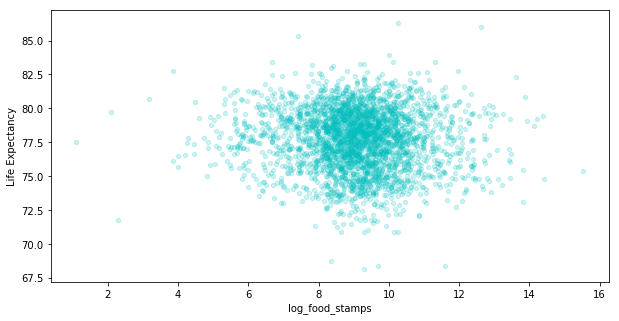

In [14]:
# Now, let's plot! 
df.plot.scatter(x='log_food_stamps',  y='Life Expectancy', s=18, figsize=(10, 5), c='c', alpha=0.2)


We can see in the scatter above that our log-tranformed Food Stamps feature does **not** seem to have a strong linear relationship with Life Expectancy. This indicates that we might have to do some more transformations with this dataset to get it ready for regression analysis.

In [15]:
# ^ should we argue that this is slightly negatively-linear? it doesn't bode well for us that
# this is not linear...

In [16]:
# should we run more transformations on this feature to get it linear? Is that allowed?

### And because why not....

Let's check out the mean life expectancy per state!

<BarContainer object of 50 artists>

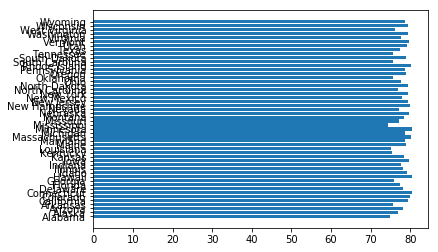

In [17]:
# group by state
grouped_by_state = round(df.groupby(['State'], axis=0).mean(),2).add_suffix('_by state').reset_index()

# plot!
plt.barh(y=grouped_by_state['State'], width=grouped_by_state['Life Expectancy_by state'])


In [18]:
# ^ this graph needs work lol

### So let's deal with those categorical variables...


In [19]:
# Something about why we make dummies

In [20]:
# Dummies for states:

# Turn states feature into a categorical variable
states = df['State'].astype('category')

# Make dummies out of the States fature & drop the first one
# (explain why you drop the first one)
dummies = pd.get_dummies(states, drop_first=True)

# Drop the State feature from the original dataframe since we now are replacing it with dummies
dropped_states = df.drop(['State'], axis=1)

# Tie the dummies to the original dataframe
df = pd.concat([dropped_states,dummies], axis = 1)


In [21]:
df

,Life Expectancy,County,Percent Smokers,Percent Obese,Unemployment_rate_2010,min_wage,log_food_stamps,Alaska,Arizona,Arkansas,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,75.74,Autauga County,25.8,30.5,8.9,7.25,9.554285,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,77.80,Baldwin County,23.0,26.6,10.0,7.25,10.529667,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,75.34,Barbour County,26.8,37.3,12.3,7.25,9.391328,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,74.13,Bibb County,30.1,34.3,11.4,7.25,8.942199,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,76.41,Blount County,27.9,30.4,9.8,7.25,9.708749,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,73.61,Bullock County,28.0,42.1,11.8,7.25,8.635687,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,73.63,Butler County,28.3,38.3,13.6,7.25,9.227296,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,74.11,Calhoun County,28.6,33.2,11.4,7.25,10.764963,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,74.09,Chambers County,29.5,35.4,14.9,7.25,9.674955,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,75.26,Cherokee County,26.1,31.4,10.6,7.25,9.211440,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#Dummies for min wage (above or below fed min wage)

#finding mean, max, min of min_wage in order to set bins properly
mean = round(df['min_wage'].mean(),2)

# creating bins for below and above the mean minimum wage
bins = [1.01,mean,20.01]

# creating new column 'Wages Measurement' to hold the binned min wages
df['Wages Measurement'] = pd.cut(df['min_wage'], bins)


In [23]:
# bins

In [24]:
# creating dummies off of that 'Wages Measurement' column + dropping first dummy
wage_dummies = pd.get_dummies(df['Wages Measurement'], drop_first=True)

#wage_dummies = pd.get_dummies(final_with_state_dums['Wages Measurement'], drop_first=True)

# combining dummies w/main dataframe
df = pd.concat([df,wage_dummies], axis = 1)

# get the ones and zeros from the min wages dummies
df['Min Wages Dummies'] = df.iloc[:,-1]

# drop the 'Wages Measurement' column
df = df.drop(df.columns[-2], axis=1)


In [55]:
# df['Min Wages Dummies'].where(df['Min Wages Dummies'] == 1).head(100)
# df.head(100)

In [26]:
df = df.drop(columns=['min_wage', 'Wages Measurement'])
df

,Life Expectancy,County,Percent Smokers,Percent Obese,Unemployment_rate_2010,log_food_stamps,Alaska,Arizona,Arkansas,California,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Min Wages Dummies
0,75.74,Autauga County,25.8,30.5,8.9,9.554285,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,77.80,Baldwin County,23.0,26.6,10.0,10.529667,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,75.34,Barbour County,26.8,37.3,12.3,9.391328,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,74.13,Bibb County,30.1,34.3,11.4,8.942199,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,76.41,Blount County,27.9,30.4,9.8,9.708749,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,73.61,Bullock County,28.0,42.1,11.8,8.635687,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,73.63,Butler County,28.3,38.3,13.6,9.227296,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,74.11,Calhoun County,28.6,33.2,11.4,10.764963,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,74.09,Chambers County,29.5,35.4,14.9,9.674955,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,75.26,Cherokee County,26.1,31.4,10.6,9.211440,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Let's now scale our features to get them all on the same page...

In [27]:
# just want to scale our continuous variables, so going to isolate those
contins = df[['Life Expectancy', 'Percent Smokers', 'Percent Obese', 'Unemployment_rate_2010', 'log_food_stamps']].dropna()

In [28]:
# for i in df['log_food_stamps']:
#     if i != float(i): 
#         print(i)

In [29]:
# instantiating a scalar
scaler = preprocessing.StandardScaler()

In [30]:
# fitting scalar to continuous vars
scaler.fit(contins)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [31]:
# redefining contins as a dataframe of our SCALED continuous vars 
contins = pd.DataFrame(scaler.transform(contins), columns=contins.columns, index=contins.index)

# should i have scaled the log-transformed food stamps data?

In [32]:
# redefining df as just our categorical variables
df = df.iloc[:,6:]

In [33]:
# join our continuous vars dataframe with what's left of our df, which is our categorical vars, to make a main dataframe w/our new scaled values
df = contins.join(df, how='left').dropna()
df

,Life Expectancy,Percent Smokers,Percent Obese,Unemployment_rate_2010,log_food_stamps,Alaska,Arizona,Arkansas,California,Colorado,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Min Wages Dummies
0,-0.874129,0.354916,-0.018295,-0.151889,0.315121,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.044955,-0.325195,-0.940898,0.195278,0.987930,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.052592,0.597812,1.590344,0.921172,0.202715,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.592443,1.399371,0.880650,0.637126,-0.107089,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.575204,0.864999,-0.041952,0.132157,0.421670,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,-1.824445,0.889288,2.725854,0.763369,-0.318518,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,-1.815522,0.962157,1.826909,1.331459,0.089568,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,-1.601366,1.035026,0.620429,0.637126,1.150235,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,-1.610290,1.253633,1.140871,1.741747,0.398358,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,-1.088285,0.427785,0.194613,0.384641,0.078631,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Let's see how our features correlate to each other...

Now that we have scaled, transformed, and dummy-ed our data to make it easier to work with, we can run a correlation analysis to see if any of our features are highly correlated with each other. If that is the case for any of our variables, we likely will want to leave them out of our final model because they increase our chances of running into multicollinearity.

We can do this with code and with a diagram. Let's see both! 

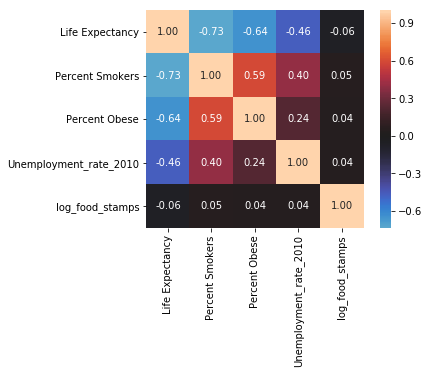

In [34]:
# correlation matrix for just our continuous variables:
sns.heatmap(contins.corr(), center=0, cbar = True, annot=True, square = True, fmt = '.2f');


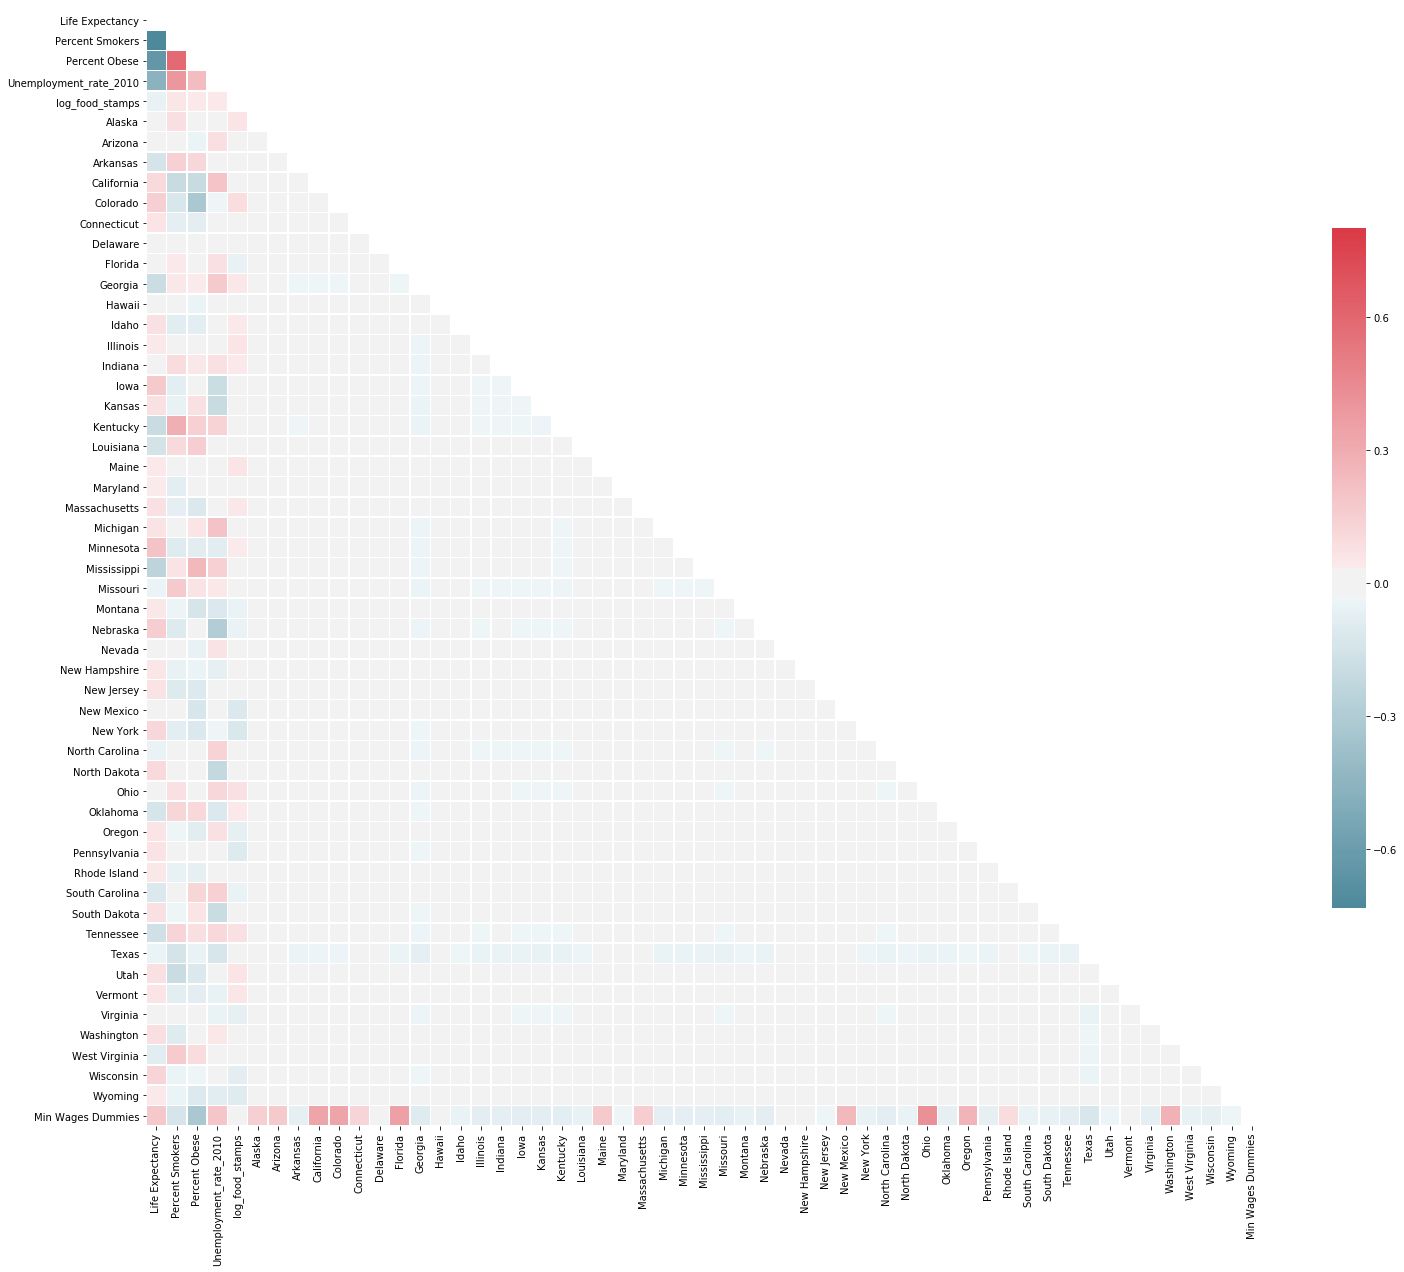

In [35]:
# looking at the correlation matrix for our continuous vars and our categorical vars together:

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 25))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [36]:
# super interesting! ^ 
# write up analysis here

In [41]:
# code way: 
corr = df.corr().abs()

,Life Expectancy,Percent Smokers,Percent Obese,Unemployment_rate_2010,log_food_stamps,Alaska,Arizona,Arkansas,California,Colorado,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Min Wages Dummies
Life Expectancy,1.000000,0.732730,0.641076,0.464770,0.056239,0.021056,0.018886,0.149977,0.104816,0.147689,...,0.164353,0.047499,0.070702,0.062238,0.000922,0.087165,0.087895,0.127706,0.041034,0.182280
Percent Smokers,0.732730,1.000000,0.594466,0.397946,0.051660,0.085462,0.021852,0.142045,0.199968,0.127704,...,0.124211,0.147457,0.199028,0.081423,0.020701,0.097213,0.161363,0.049389,0.047563,0.143605
Percent Obese,0.641076,0.594466,1.000000,0.235111,0.040801,0.007482,0.046596,0.112109,0.205179,0.329264,...,0.082697,0.054100,0.112058,0.075633,0.017579,0.026960,0.098578,0.034007,0.107056,0.330677
Unemployment_rate_2010,0.464770,0.397946,0.235111,1.000000,0.040179,0.013748,0.082389,0.015654,0.198741,0.034874,...,0.106619,0.132496,0.028313,0.056561,0.054307,0.049487,0.012627,0.002245,0.089593,0.190501
log_food_stamps,0.056239,0.051660,0.040801,0.040179,1.000000,0.061034,0.007585,0.016887,0.015780,0.087993,...,0.072473,0.031218,0.060060,0.052051,0.063199,0.015703,0.025179,0.078812,0.095794,0.028201
Alaska,0.021056,0.085462,0.007482,0.013748,0.061034,1.000000,0.004518,0.010136,0.008870,0.008949,...,0.011337,0.019222,0.006297,0.004364,0.011080,0.007315,0.008629,0.009852,0.005602,0.152381
Arizona,0.018886,0.021852,0.046596,0.082389,0.007585,0.004518,1.000000,0.011339,0.009922,0.010011,...,0.012682,0.021501,0.007044,0.004882,0.012395,0.008182,0.009653,0.011020,0.006267,0.170453
Arkansas,0.149977,0.142045,0.112109,0.015654,0.016887,0.010136,0.011339,1.000000,0.022261,0.022459,...,0.028452,0.048239,0.015803,0.010952,0.027807,0.018357,0.021656,0.024724,0.014059,0.066520
California,0.104816,0.199968,0.205179,0.198741,0.015780,0.008870,0.009922,0.022261,1.000000,0.019654,...,0.024898,0.042213,0.013829,0.009584,0.024334,0.016064,0.018951,0.021636,0.012303,0.334650
Colorado,0.147689,0.127704,0.329264,0.034874,0.087993,0.008949,0.010011,0.022459,0.019654,1.000000,...,0.025120,0.042589,0.013952,0.009670,0.024551,0.016207,0.019120,0.021829,0.012413,0.337631


We can use the triangular correlation matrix above to weed out any features that might have very high correlations with any other features. By toggling the number after the ">" in the code below, we can see which features have correlations higher than certain thresholds.

Lucky for us, our highest correlated feature is percent smokers, with a correlation (~73%) with life expectancy, which isn't really high enough to take it out of the running for our model. Let's leave it in.

In [54]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
potential_drop = [column for column in upper.columns if any(upper[column] > 0.73)]

potential_drop

['Percent Smokers']

In [ ]:
# how do you know what's a high enough correlation value for multicollinearity?

### Finally, let's run our scatter plots again to see if anything's changed...

In [56]:
# let's see if they look different after scaling our features

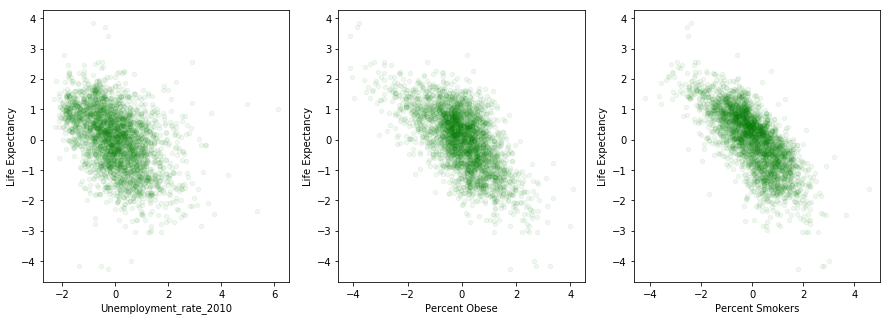

In [57]:
# setting up our scatters to have 2x3
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

# Loop through continuous variables to create scatter plots
for xcol, ax in zip(['Unemployment_rate_2010','Percent Obese','Percent Smokers'], axes):
    df.plot(kind='scatter', x=xcol, y='Life Expectancy', ax=ax, alpha=0.06, color='g')

In [ ]:
# lol they do, this ^ isn't interesting

In [ ]:
# Things to do to finish: 
# 1) write in analysis parts / more "whys"
# 2) maybe plot some categorical variables just to show people what they look like
# 3) maybe plot some dummy vars too
# 4) work a whisker plot in there somehow

### Onto feature engineering!

In [ ]:
#RH this is a test

# mean = round(df['min_wage'].mean(),2)
# bins = [0, mean, 10]
# df['Wages Measurement'] = pd.cut(df['min_wage'], bins)
# wage_dummies = pd.get_dummies(df['Wages Measurement'], drop_first=True)
# final_stateDums_wagesDums = pd.concat([df,wage_dummies], axis = 1)
# final_stateDums_wagesDums['Min Wages Dummies'] = final_stateDums_wagesDums.iloc[:,-1]
# deleting = final_stateDums_wagesDums.drop(final_stateDums_wagesDums.columns[-3:-1], axis=1)



# final_stateDums_wagesDums.head(100)
# final_stateDums_wagesDums['Min Wages Dummies'].where(final_stateDums_wagesDums['Min Wages Dummies'] == 1).head(100)
# deleting

In [ ]:
# mean = round(df['Min Wage'].mean(),2)

# bins = [0,mean,10]

# final_with_state_dums['Wages Measurement'] = pd.cut(final_with_state_dums['Min Wage'],bins)

# final_with_state_dums

# wage_dummies = pd.get_dummies(final_with_state_dums['Wages Measurement'], drop_first=True)

# final_stateDums_wagesDums = pd.concat([final_with_state_dums,wage_dummies], axis = 1)

# final_stateDums_wagesDums['Min Wages Dummies'] = final_stateDums_wagesDums.iloc[:,-1]

# deleting = final_stateDums_wagesDums.drop(final_stateDums_wagesDums.columns[-2], axis=1)

# final = deleting.drop(deleting.columns[-2], axis=1)


# final['Min Wages Dummies'].where(final['Min Wages Dummies'] == 1).tail(100)

In [ ]:
# Scatter plots showing relationships between target and continuous variables PART 2
# fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(17,5))

# for xcol, ax in zip(['Jan & July Public Assist. Participation','Jan & July Non-Public Assist. Participation', 'Jan & July TOTAL Assist. Participation',"Unemployment_rate_2010"], axes):
#     df.plot(kind='scatter', x=xcol, y='Life expectancy 2010', ax=ax, alpha=0.4, color='b')

# # The graphs for Public Assistance have large outliers


In [ ]:
# Initial test of hist for one contiuous variable

# plt.hist(df['Percent Smokers'], bins=40)
# plt.show()

In [ ]:
# Histograms of all contiuous variables

# df.hist(column=['Obesity', 'Min Wage', 'Percent Smokers', 'Jan & July Public Assist. Participation','Jan & July Non-Public Assist. Participation', 'Jan & July TOTAL Assist. Participation',"Unemployment_rate_2010"], figsize=(30,20))
                

In [ ]:
# Run log transform on Food Stamps vars after checking initial histogram for normality

# Create new dataframe to pass in log values of Food Stamps var
# data_log = pd.DataFrame([])

# # Create columns to hold log values
# data_log['log_PA'] = np.log(df['Jan & July Public Assist. Participation'])
# data_log['log_NPA'] = np.log(df['Jan & July Non-Public Assist. Participation'])
# data_log['log_TA'] = np.log(df['Jan & July TOTAL Assist. Participation'])

# # If value is zero, it will be negative inf when taking the log
# data_log = data_log.replace([np.inf, -np.inf], np.nan).dropna(subset=['log_PA'], how="all")
# data_log = data_log.replace([np.inf, -np.inf], np.nan).dropna(subset=['log_NPA'], how="all")
# data_log = data_log.replace([np.inf, -np.inf], np.nan).dropna(subset=['log_TA'], how="all")

# # Graphing the normalized histogram
# data_log.hist(figsize=[9,9]);


In [ ]:
# data_log.head()

In [ ]:
# We are joining our log-ed cat vars with our original dataframe to perform OLS analysis later

# final_with_logs = df.join(data_log, how= 'outer').dropna()

# final_with_logs.to_csv('csv_files/final_with_logs.csv', encoding='utf-8', index=False)
